<a href="https://colab.research.google.com/github/fatumaahmed2024/AI-Coursework-2025/blob/main/Airplane_Crashes_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')

Saving Airplane_Crashes_and_Fatalities_Since_1908.csv to Airplane_Crashes_and_Fatalities_Since_1908.csv


In [5]:
#Q2-no of columns and rows
df.shape

(5268, 13)

In [6]:
#Q3
df.tail(75)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
5193,03/15/2008,08:15,"Nbagu, Nigeria",Trade Wings Aviation Ltd.,NaN,Lagos - Bebi Air Strip,Beechcraft 1900D,5N-JAH,UE-322,3.0,3.0,0.0,The plane crashed while en route. Wreckage was...
5194,04/03/2008,11:00,"Lawa, Suriname",Blue Wing Airlines,NaN,Paramaribo - Lawa,Antonov An-28,PZ-TSO,1AJ007-17,19.0,19.0,0.0,While attempting to land the crew aborted the ...
5195,04/09/2008,23:27,"Bundeena, Australia",Avtex Air Services,NaN,Sydney - Brisbane,Swearingen SA227AC Metroliner III,VH-OZA,AC-600,1.0,1.0,0.0,The pilot of the mail plane reported some mino...
5196,04/11/2008,22:15,"Chrisinau, Moldova",Kata Transportation,NaN,"Chrisinau, Moldova - Antalya, Turkey - Sudan",Antonov An-32,ST-AZL,3009,8.0,8.0,0.0,Just minutes after the take off the plane trie...
5197,04/15/2008,14:30,"Goma, Congo",Hewa Bora Airways,NaN,Goma - Kisangani - Kinshasa,McDonnell Douglas DC-9-51,9Q-CHN,47731,85.0,0.0,47.0,"While attempting to takeoff, the plane failed ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


For missing Time values, leave them blank(NaN) or write "Unkown" since time is not usually needed for calculations.

If the Location is missing, fill it with "Unkown" because location data is text-based and should not be estimated automatically.

When Operator, Airline or Aircraft values are missing, replace them with "Unknown" and create a separate column to show that the data was missing.

For the Aboard column, if only a few values are missing, use the median from similar cases(eg the same aircraft type or airline). If many are missing, leave them blank and add a missing flag.

Missing Fatalities values should normally be left blank.Only impute if necessary, using a group median and clearly marking the imputed values, since wrong estimates can affect accuracy.

For Survivors, calculate the number by subtracting Fatalities from Abroad when both are available. If either value is missing, leave it blank and add a missing flag.

If the Summary or Narrative text is missing, simply leave it empty or as NaN because text cannot be reliably filled in.

In [7]:
#Q5
fatality_locations = df[['Date', 'Location', 'Aboard', 'Fatalities']].copy()




In [8]:
#Q6
date_highest = fatality_locations.loc[fatality_locations['Fatalities'].idxmax(), 'Date']
print("Date of the highest recorded fatalities: ",date_highest)

Date of the highest recorded fatalities:  03/27/1977


In [9]:
#Q7
zero_fatalities = (fatality_locations['Fatalities'] ==0).sum()
print("Number of crushes with zero fatalities: ", zero_fatalities)


Number of crushes with zero fatalities:  58


In [10]:
#Q8
fatality_locations[['Region', 'State_Country']] = fatality_locations['Location'].str.split(',', n=1, expand=True)

fatality_locations['Region'] = fatality_locations['Region'].str.strip()
fatality_locations['State_Country'] = fatality_locations['State_Country'].str.strip()


In [11]:
#Q9
top100 = fatality_locations.sort_values(by='Fatalities', ascending=False).head(100)
top100[['Date', 'Region', 'State_Country','Aboard', 'Fatalities']]

,Date,Region,State_Country,Aboard,Fatalities
2963,03/27/1977,Tenerife,Canary Islands,644.0,583.0
3568,08/12/1985,Mt. Osutaka,"near Ueno Village, Japan",524.0,520.0
4455,11/12/1996,Near Charkhidadri,India,349.0,349.0
2726,03/03/1974,Near Ermenonville,France,346.0,346.0
3562,06/23/1985,AtlantiOcean,110 miles West of Ireland,329.0,329.0
...,...,...,...,...,...
4852,04/15/2002,Busan,South Korea,166.0,128.0
3198,01/21/1980,Elburz Mtns.,"near Laskarak, Markazi, Iran",128.0,128.0
1701,12/16/1960,Staten Island / Brooklyn,New York,128.0,128.0
5108,07/09/2006,Irkutsk,Russia,203.0,128.0


<function matplotlib.pyplot.show(close=None, block=None)>

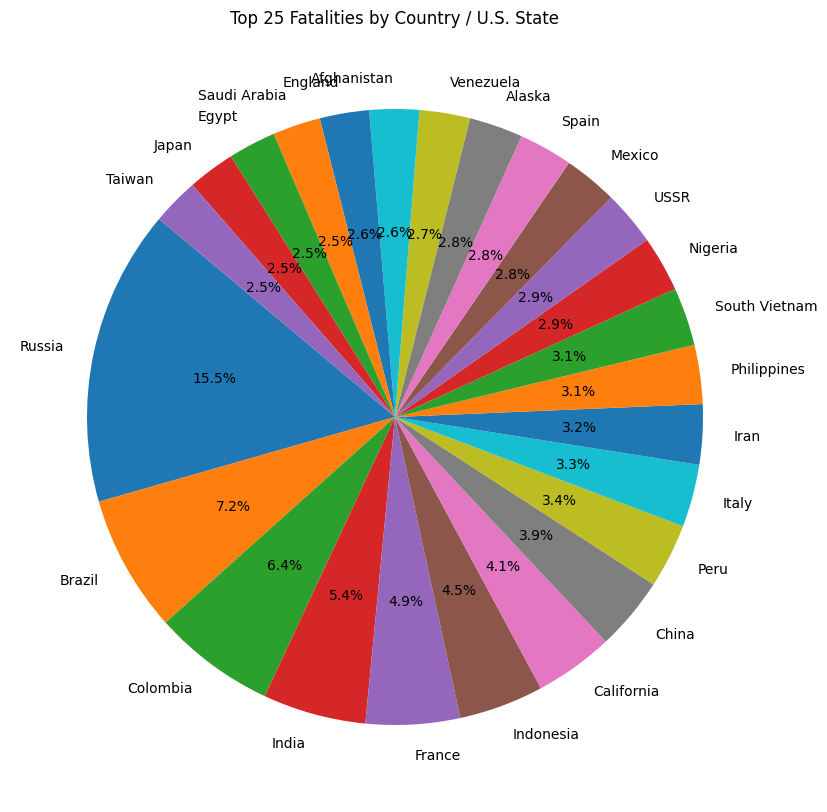

In [12]:
#Q10
import matplotlib.pyplot as plt

top25 = fatality_locations.groupby('State_Country')['Fatalities'].sum().sort_values(ascending=False).head(25)

#Pie chart
plt.figure(figsize=(10,10))
plt.pie(top25, labels=top25.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 25 Fatalities by Country / U.S. State')
plt.show

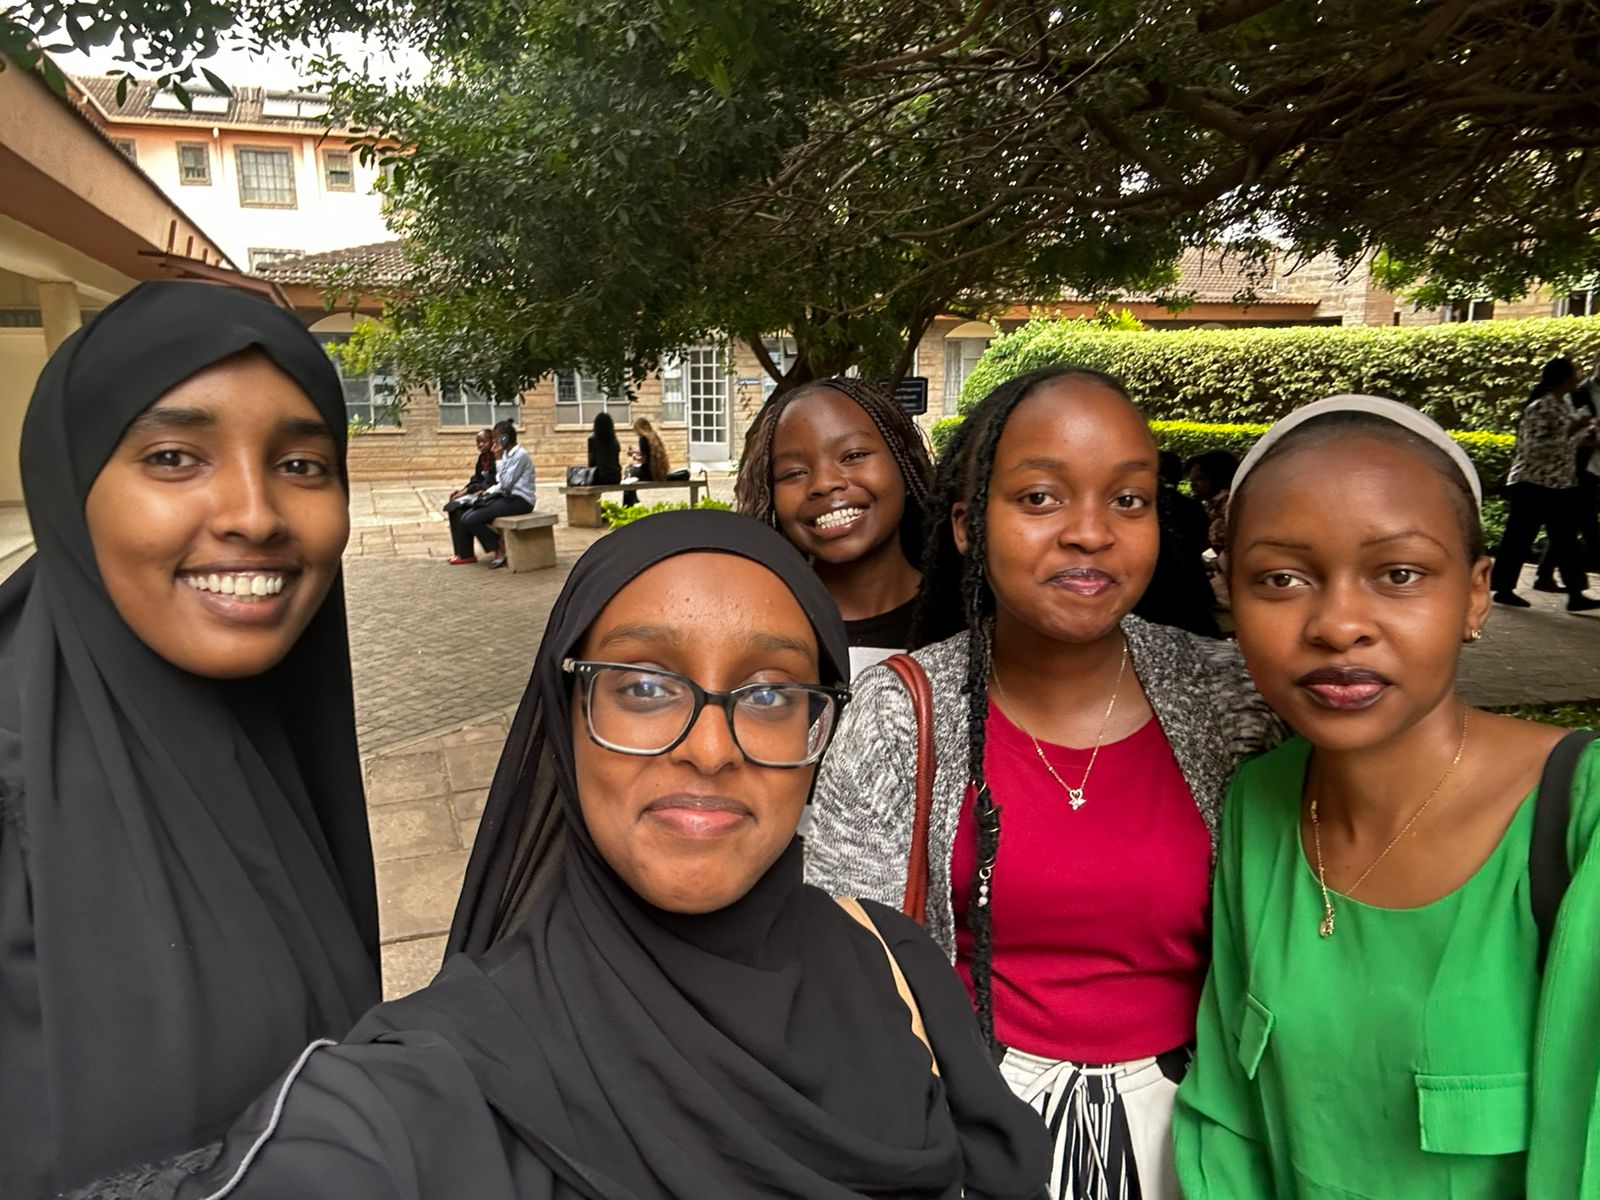